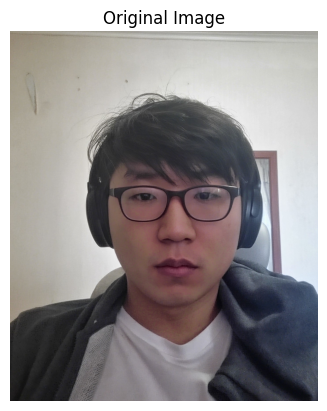

In [ ]:
import os
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

my_image_path = 'a3.jpg'
sticker_path = 'cat-whiskers.png'


img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()  # 출력용 이미지 복사

# 이미지 시각화 (BGR → RGB)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()



In [ ]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()


Saving cat-whiskers.png to cat-whiskers.png


In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2


--2025-01-24 05:26:15--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-01-24 05:26:15--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  13.6MB/s    in 4.5s    

2025-01-24 05:26:20 (13.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



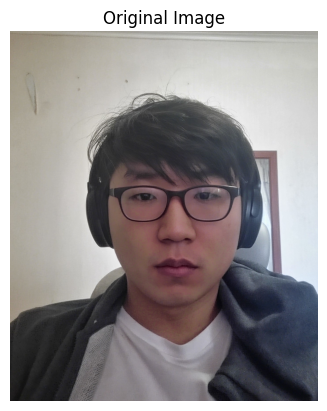

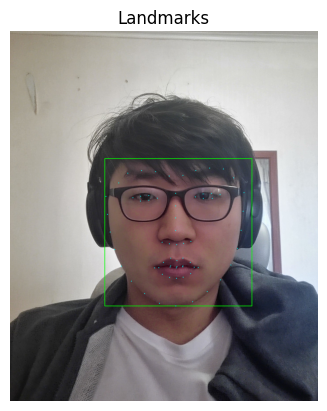

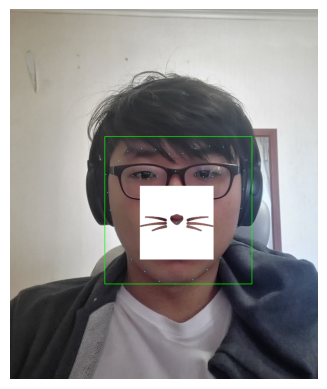

In [ ]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

my_image_path = 'a3.jpg'
sticker_path = 'cat-whiskers.png'


img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()

# 이미지 시각화 (BGR → RGB)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# 얼굴 검출기와 랜드마크 모델 초기화
detector_hog = dlib.get_frontal_face_detector()
model_path = 'shape_predictor_68_face_landmarks.dat'  # dlib 모델 경로
landmark_predictor = dlib.shape_predictor(model_path)

# 얼굴 검출
dlib_rects = detector_hog(img_rgb, 1)

# 랜드마크 추출
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 랜드마크와 얼굴 영역 시각화
for dlib_rect in dlib_rects:
    l, t, r, b = dlib_rect.left(), dlib_rect.top(), dlib_rect.right(), dlib_rect.bottom()
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 2)

for landmark in list_landmarks:
    for pt in landmark:
        cv2.circle(img_show, pt, 2, (255, 255, 0), -1)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.title('Landmarks')
plt.axis('off')
plt.show()

# 스티커 적용
img_sticker = cv2.imread(sticker_path)  #

# 첫 번째 얼굴의 랜드마크 기준으로 스티커 적용
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x_landmark, y_landmark = landmark[33]  # 코끝 기준
    w = dlib_rect.width()
    h = dlib_rect.height()

    # 스티커 크기 조정
    sticker_w = w // 2
    sticker_h = h // 2
    img_sticker = cv2.resize(img_sticker, (sticker_w, sticker_h))

    # 좌표 조정
    refined_x = x_landmark - (sticker_w // 2)
    refined_y = y_landmark - (sticker_h // 2)

    # 이미지 범위 벗어나지 않도록 crop
    if refined_x < 0:
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0
    if refined_x + img_sticker.shape[1] > img_bgr.shape[1]:
        overflow_x = (refined_x + img_sticker.shape[1]) - img_bgr.shape[1]
        img_sticker = img_sticker[:, :-overflow_x]
    if refined_y + img_sticker.shape[0] > img_bgr.shape[0]:
        overflow_y = (refined_y + img_sticker.shape[0]) - img_bgr.shape[0]
        img_sticker = img_sticker[:-overflow_y, :]

    # 적용 구역 추출
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0],
                            refined_x:refined_x+img_sticker.shape[1]]

    # 스티커 합성
    img_show[refined_y:refined_y+img_sticker.shape[0],
             refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker == 0, sticker_area, img_sticker)

# 결과 확인
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


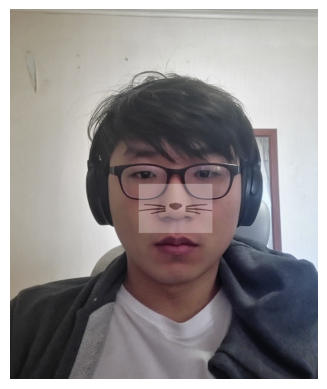

In [ ]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

my_image_path = 'a3.jpg'
sticker_path = 'cat-whiskers.png'

img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()

# 얼굴 검출기 및 랜드마크 모델 초기화
detector_hog = dlib.get_frontal_face_detector()
model_path = 'shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# 얼굴 검출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

# 랜드마크 추출
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 첫 번째 얼굴의 랜드마크 기준으로 작업
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x_landmark, y_landmark = landmark[30]
    w = dlib_rect.width()
    h = dlib_rect.height()

    # 스티커 로드 및 크기 조정
    img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 스티커 이미지 (RGBA 지원)
    sticker_w = w // 2
    sticker_h = h // 3
    img_sticker = cv2.resize(img_sticker, (sticker_w, sticker_h))

    # 좌표 조정
    refined_x = x_landmark - (sticker_w // 2)
    refined_y = y_landmark - (sticker_h // 2)

    # 이미지 범위 벗어나지 않도록 crop
    if refined_x < 0:
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :]
        refined_y = 0
    if refined_x + img_sticker.shape[1] > img_bgr.shape[1]:
        overflow_x = (refined_x + img_sticker.shape[1]) - img_bgr.shape[1]
        img_sticker = img_sticker[:, :-overflow_x]
    if refined_y + img_sticker.shape[0] > img_bgr.shape[0]:
        overflow_y = (refined_y + img_sticker.shape[0]) - img_bgr.shape[0]
        img_sticker = img_sticker[:-overflow_y, :]

    # 스티커 영역 추출
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0],
                            refined_x:refined_x+img_sticker.shape[1]]

    # 스티커와 원본 이미지 합성 (투명도 적용)
    alpha = 0.3  # 스티커 투명도
    beta = 1.0 - alpha  # 원본 이미지 투명도
    gamma = 0  # 추가 연산값
    blended = cv2.addWeighted(sticker_area, beta, img_sticker[:, :, :3], alpha, gamma)

    # 합성된 결과를 원본 이미지에 반영
    img_show[refined_y:refined_y+img_sticker.shape[0],
             refined_x:refined_x+img_sticker.shape[1]] = blended

# 결과 시각화
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Processing a1.jpg...


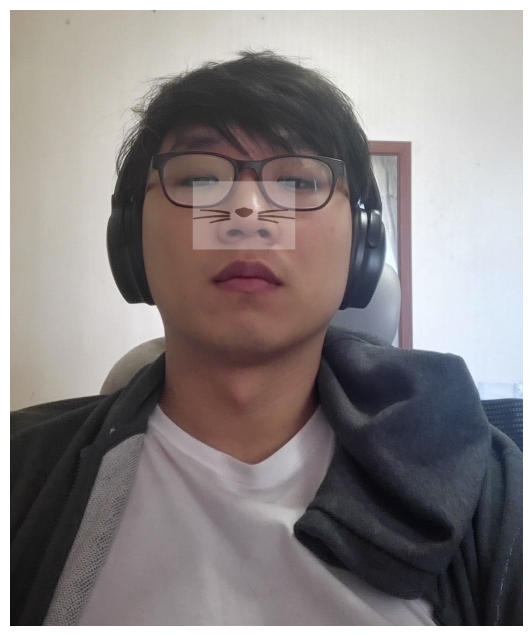

Processing a2.jpg...


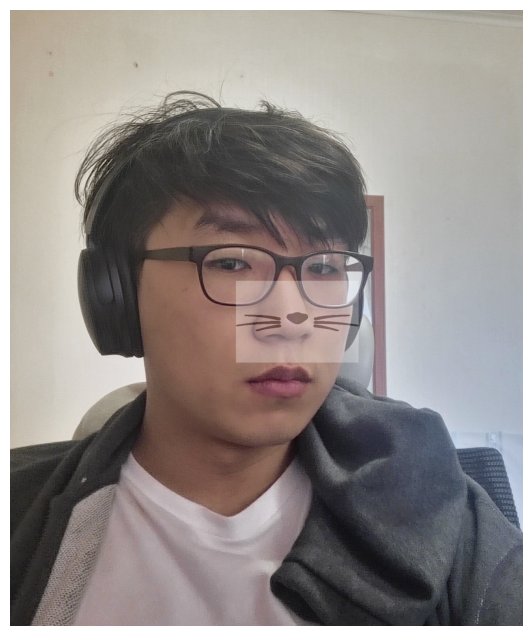

In [ ]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# 이미지 파일 목록
image_files = ['a1.jpg', 'a2.jpg']  # 처리할 이미지 파일 리스트
sticker_path = 'cat-whiskers.png'

# 얼굴 검출기 및 랜드마크 모델 초기화
detector_hog = dlib.get_frontal_face_detector()
model_path = 'shape_predictor_68_face_landmarks.dat'  # dlib 모델 경로
landmark_predictor = dlib.shape_predictor(model_path)

# 각 이미지 처리
for image_file in image_files:
    print(f"Processing {image_file}...")

    # 이미지 로드
    img_bgr = cv2.imread(image_file)
    if img_bgr is None:
        print(f"Failed to load {image_file}. Skipping...")
        continue

    img_show = img_bgr.copy()  # 출력용 이미지 복사
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # 얼굴 검출
    dlib_rects = detector_hog(img_rgb, 1)

    # 랜드마크 추출
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    # 각 얼굴에 대해 스티커 적용
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x_landmark, y_landmark = landmark[30]
        w = dlib_rect.width()
        h = dlib_rect.height()

        # 스티커 로드 및 크기 조정
        img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # 스티커 이미지 (RGBA 지원)
        sticker_w = w // 2
        sticker_h = h // 3
        img_sticker = cv2.resize(img_sticker, (sticker_w, sticker_h))

        # 좌표 조정
        refined_x = x_landmark - (sticker_w // 2)
        refined_y = y_landmark - (sticker_h // 2)

        # 이미지 범위 벗어나지 않도록 crop
        if refined_x < 0:
            img_sticker = img_sticker[:, -refined_x:]
            refined_x = 0
        if refined_y < 0:
            img_sticker = img_sticker[-refined_y:, :]
            refined_y = 0
        if refined_x + img_sticker.shape[1] > img_bgr.shape[1]:
            overflow_x = (refined_x + img_sticker.shape[1]) - img_bgr.shape[1]
            img_sticker = img_sticker[:, :-overflow_x]
        if refined_y + img_sticker.shape[0] > img_bgr.shape[0]:
            overflow_y = (refined_y + img_sticker.shape[0]) - img_bgr.shape[0]
            img_sticker = img_sticker[:-overflow_y, :]

        # 스티커 영역 추출
        sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0],
                                refined_x:refined_x+img_sticker.shape[1]]

        # 스티커와 원본 이미지 합성 (투명도 적용)
        alpha = 0.3  # 스티커 투명도
        beta = 1.0 - alpha  # 원본 이미지 투명도
        gamma = 0  # 추가 연산값
        blended = cv2.addWeighted(sticker_area, beta, img_sticker[:, :, :3], alpha, gamma)

        # 합성된 결과를 원본 이미지에 반영
        img_show[refined_y:refined_y+img_sticker.shape[0],
                 refined_x:refined_x+img_sticker.shape[1]] = blended

    # 결과 시각화
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


얼굴 각도를 다르게 해서 3장을 인식시켰는데 잘 인식이 되었다. 이미지 밝기, 촬영거리, 장애물, 표정 등등을 달리해서 인식시키면 어떻게 될까 궁금했는데 차마 못하겠어서..